### Machine Learning Models FOr Predicting Thyroid Cancer Recurrence A comparative Analysis
### Import Library Files

In [290]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt

In [291]:
df = pd.read_csv("hypothyroid.csv")
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,P
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,P
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,P
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,P


### Dataset Overview

In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [293]:
df.describe()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,94,3,2,2,2,2,2,2,2,2,...,2,242,2,147,2,235,1,1,5,2
top,59,F,f,f,f,f,f,f,f,f,...,t,?,t,?,t,?,f,?,other,P
freq,95,2480,3308,3722,3729,3625,3719,3719,3713,3538,...,3541,231,3385,387,3387,385,3772,3772,2201,3481


In [294]:
df.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'binaryClass'],
      dtype='object')

In [295]:
# Replace '?' with NaN
df.replace('?', pd.NA, inplace=True)
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,<NA>,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,<NA>,f,<NA>,f,<NA>,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,<NA>,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,<NA>,f,<NA>,f,<NA>,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,<NA>,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,f,<NA>,f,<NA>,f,<NA>,f,<NA>,other,P
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,<NA>,SVI,P
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,<NA>,other,P
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,<NA>,SVI,P


In [296]:
import pandas as pd

# Drop columns that contain any NaN or missing values
df.dropna(axis=1, inplace=True)

df


,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,...,hypopituitary,psych,TSH measured,T3 measured,TT4 measured,T4U measured,FTI measured,TBG measured,referral source,binaryClass
0,f,f,f,f,f,f,f,f,f,f,...,f,f,t,t,t,t,t,f,SVHC,P
1,f,f,f,f,f,f,f,f,f,f,...,f,f,t,t,t,f,f,f,other,P
2,f,f,f,f,f,f,f,f,f,f,...,f,f,t,f,t,t,t,f,other,P
3,t,f,f,f,f,f,f,f,f,f,...,f,f,t,t,t,f,f,f,other,P
4,f,f,f,f,f,f,f,f,f,f,...,f,f,t,t,t,t,t,f,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,other,P
3768,f,f,f,f,f,f,f,f,f,f,...,f,f,t,t,t,t,t,f,SVI,P
3769,f,f,f,f,f,f,f,f,t,f,...,f,f,t,t,t,t,t,f,other,P
3770,f,f,f,f,f,f,f,f,f,f,...,f,f,t,t,t,t,t,f,SVI,P


In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   on thyroxine               3772 non-null   object
 1   query on thyroxine         3772 non-null   object
 2   on antithyroid medication  3772 non-null   object
 3   sick                       3772 non-null   object
 4   pregnant                   3772 non-null   object
 5   thyroid surgery            3772 non-null   object
 6   I131 treatment             3772 non-null   object
 7   query hypothyroid          3772 non-null   object
 8   query hyperthyroid         3772 non-null   object
 9   lithium                    3772 non-null   object
 10  goitre                     3772 non-null   object
 11  tumor                      3772 non-null   object
 12  hypopituitary              3772 non-null   object
 13  psych                      3772 non-null   object
 14  TSH meas

### Expolatory Data Analysis ( EDA )

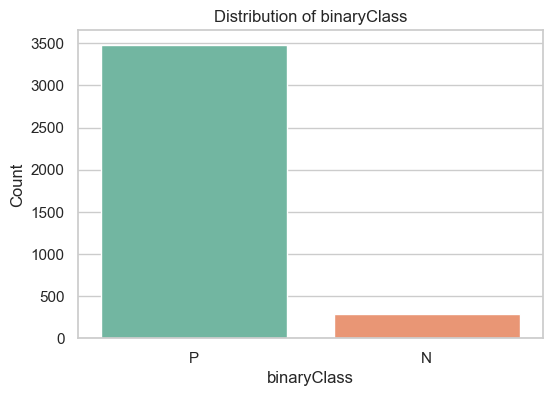

In [298]:
# Count plot for the binaryClass target
plt.figure(figsize=(6, 4))
sns.countplot(x='binaryClass', data=df, palette='Set2')
plt.title('Distribution of binaryClass')
plt.xlabel('binaryClass')
plt.ylabel('Count')
plt.show()

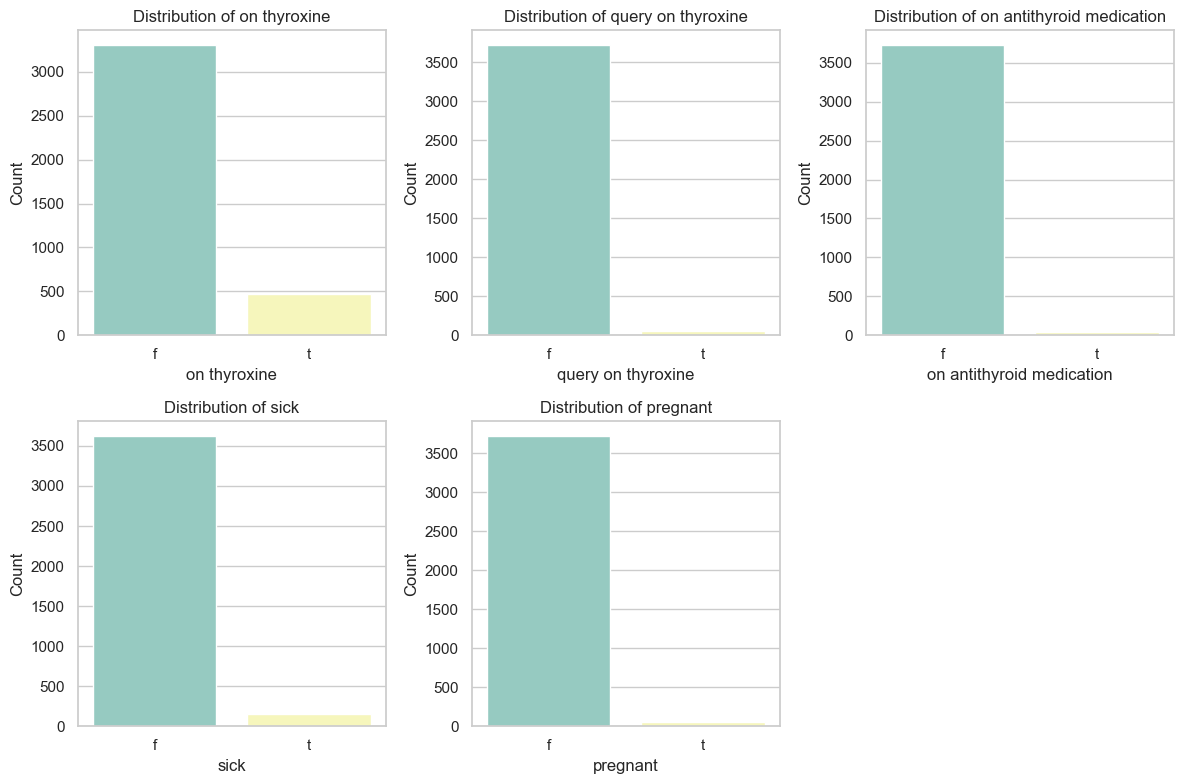

In [299]:
# Example for a few categorical features
categorical_columns = ['on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant']

plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)  # Arrange the plots in 2x3 grid
    sns.countplot(x=col, data=df, palette='Set3')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


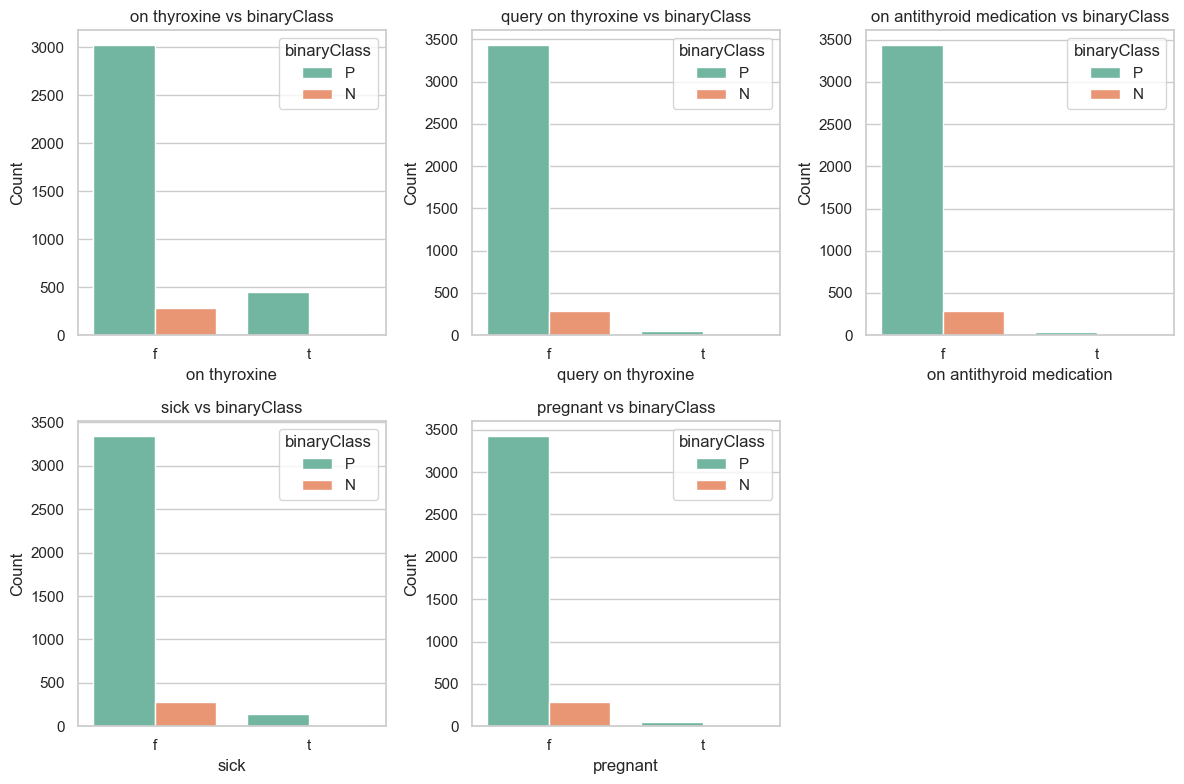

In [300]:
# Example for comparing categorical features with binaryClass
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, hue='binaryClass', data=df, palette='Set2')
    plt.title(f'{col} vs binaryClass')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


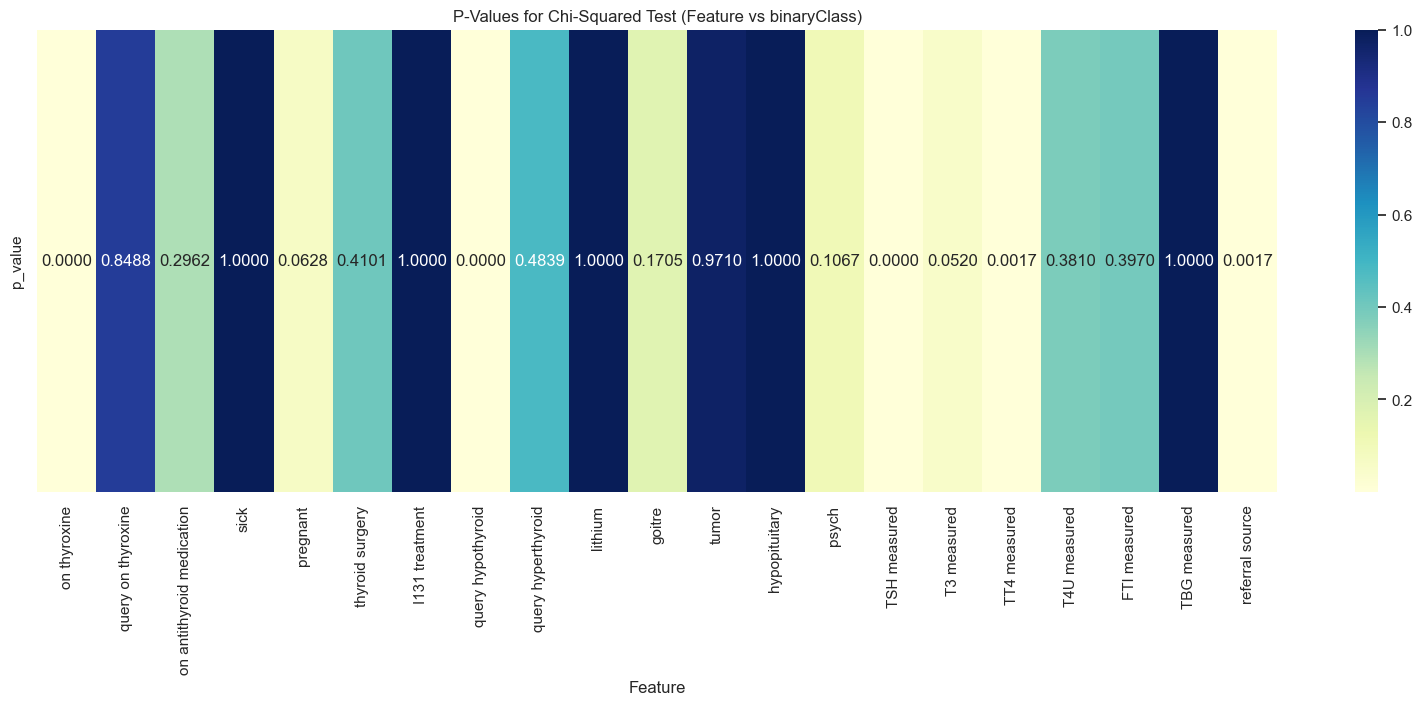

In [301]:
from scipy.stats import chi2_contingency
import numpy as np

# Function to calculate p-values for Chi-Squared Test
def chi_squared(df, target):
    p_values = {}
    for column in df.columns:
        if column != target:
            contingency_table = pd.crosstab(df[column], df[target])
            _, p, _, _ = chi2_contingency(contingency_table)
            p_values[column] = p
    return p_values

# Run chi-squared test for each feature
p_values = chi_squared(df, 'binaryClass')

# Create a DataFrame of p-values
p_values_df = pd.DataFrame(list(p_values.items()), columns=['Feature', 'p_value'])

# Plot heatmap of p-values (lower p-value indicates stronger correlation)
plt.figure(figsize=(20, 6))
sns.heatmap(p_values_df.set_index('Feature').T, annot=True, cmap='YlGnBu', fmt=".4f")
plt.title('P-Values for Chi-Squared Test (Feature vs binaryClass)')
plt.show()


<Figure size 1000x600 with 0 Axes>

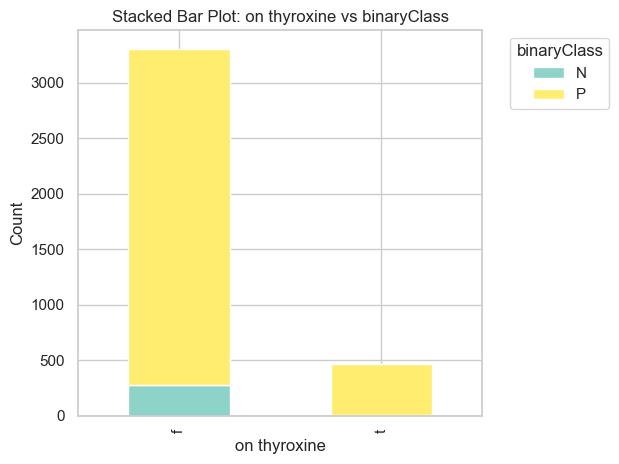

In [302]:
# Stacked bar plot for categorical feature distribution vs binaryClass
plt.figure(figsize=(10, 6))
df.groupby(['on thyroxine', 'binaryClass']).size().unstack().plot(kind='bar', stacked=True, colormap='Set3')
plt.title('Stacked Bar Plot: on thyroxine vs binaryClass')
plt.xlabel('on thyroxine')
plt.ylabel('Count')
plt.legend(title="binaryClass", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


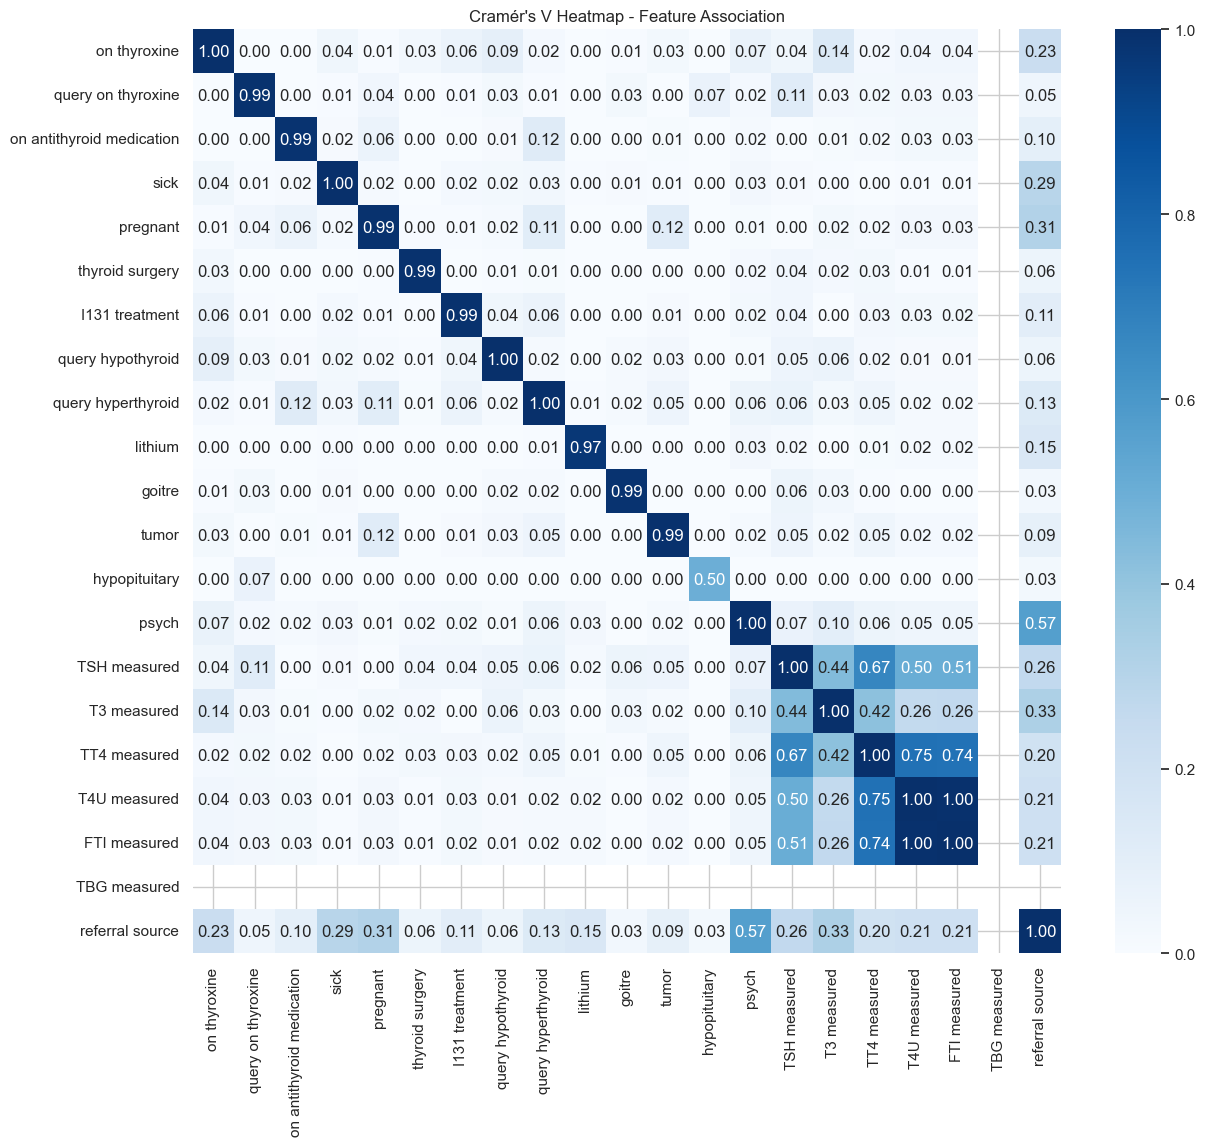

In [303]:
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

# Function to calculate Cramér's V for categorical features
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, p, dof, ex = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

# Compute pairwise Cramér's V statistics
cramers_matrix = pd.DataFrame(np.zeros((df.shape[1]-1, df.shape[1]-1)), columns=df.columns[:-1], index=df.columns[:-1])
for i in range(df.shape[1]-1):
    for j in range(df.shape[1]-1):
        cramers_matrix.iloc[i, j] = cramers_v(df.iloc[:, i], df.iloc[:, j])

# Plot the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(cramers_matrix, annot=True, cmap='Blues', fmt='.2f', cbar=True)
plt.title("Cramér's V Heatmap - Feature Association")
plt.show()


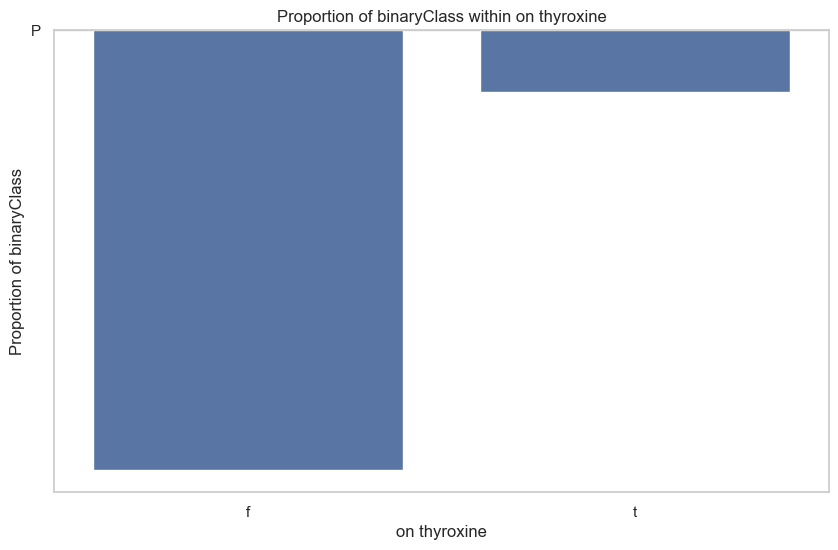

In [304]:
# Bar plot with proportions for a feature vs binaryClass
plt.figure(figsize=(10, 6))
sns.barplot(x='on thyroxine', y='binaryClass', data=df, estimator=lambda x: len(x) / len(df))
plt.title('Proportion of binaryClass within on thyroxine')
plt.xlabel('on thyroxine')
plt.ylabel('Proportion of binaryClass')
plt.show()


### Data Preprocessing 

In [305]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [306]:
# 2. Label Encoding for Categorical Columns
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
# List all the categorical columns (excluding the target column 'binaryClass')
categorical_columns = ['sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication',
                       'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid',
                       'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych',
                       'TSH measured', 'T3 measured', 'TT4 measured', 'T4U measured', 'FTI measured',
                       'TBG measured', 'referral source']

# Check if the columns exist in the dataset before applying label encoding
for col in categorical_columns:
    if col in df.columns:
        df[col] = label_encoder.fit_transform(df[col])

# 3. Split the dataset into features and target
X = df.drop('binaryClass', axis=1)  # Drop the target column
y = df['binaryClass']  # This is the target column

# 4. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Feature Scaling (if needed, depending on the model you use)
# Standardize the features (mean=0, std=1) for models that are sensitive to feature scale (e.g., SVM, logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



### Model
### Logistic Regression

In [307]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Logistic Regression Model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_logreg = logreg.predict(X_test_scaled)

# Classification Report and Accuracy
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

Logistic Regression:
Accuracy: 0.9231788079470199
              precision    recall  f1-score   support

           N       0.00      0.00      0.00        58
           P       0.92      1.00      0.96       697

    accuracy                           0.92       755
   macro avg       0.46      0.50      0.48       755
weighted avg       0.85      0.92      0.89       755



### Random Forest Classifier

In [308]:
from sklearn.ensemble import RandomForestClassifier

# 2. Random Forest Model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test_scaled)

# Classification Report and Accuracy
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest:
Accuracy: 0.9152317880794701
              precision    recall  f1-score   support

           N       0.00      0.00      0.00        58
           P       0.92      0.99      0.96       697

    accuracy                           0.92       755
   macro avg       0.46      0.50      0.48       755
weighted avg       0.85      0.92      0.88       755



### Support Vector Machine 

In [309]:
from sklearn.svm import SVC

# 3. Support Vector Machine (SVM) Model
svm = SVC(random_state=42)
svm.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_svm = svm.predict(X_test_scaled)

# Classification Report and Accuracy
print("Support Vector Machine (SVM):")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


Support Vector Machine (SVM):
Accuracy: 0.919205298013245
              precision    recall  f1-score   support

           N       0.00      0.00      0.00        58
           P       0.92      1.00      0.96       697

    accuracy                           0.92       755
   macro avg       0.46      0.50      0.48       755
weighted avg       0.85      0.92      0.88       755



### Comparisons

Logistic Regression Accuracy: 0.9231788079470199
Random Forest Accuracy: 0.9152317880794701
SVM Accuracy: 0.919205298013245


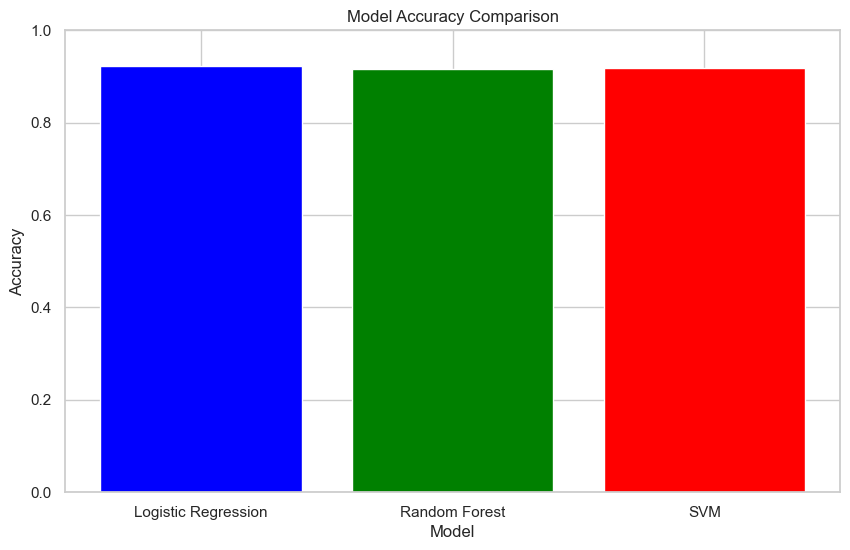

In [310]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Assuming models are already trained (Logistic Regression, Random Forest, SVM)
# and predictions are stored in y_pred_logreg, y_pred_rf, y_pred_svm

# Dictionary to store accuracy scores
accuracy_scores = {
    "Logistic Regression": accuracy_score(y_test, y_pred_logreg),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "SVM": accuracy_score(y_test, y_pred_svm)
}

# Print the accuracy scores
for model_name, accuracy in accuracy_scores.items():
    print(f"{model_name} Accuracy: {accuracy}")

# Create a histogram to compare accuracy scores
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'green', 'red'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.show()
